Loop through subsetted ATL03 files & plot them to do a quick quality control check

In [50]:
#import functions
import os
import h5py
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


# make sure we're dealing with the most recent version of any code we're using
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
#Read the data, changing the directory name as necessary
from readers.read_HDF5_ATL03 import read_HDF5_ATL03
from readers.get_ATL03_x_atc import get_ATL03_x_atc

# read the IS2 data with Tyler's ATL03 reader:
ATL03_file=glob('/home/jovyan/crackup/ATL03-George-meltponds/processed*20190206*.h5')
print('Number of ATL03 files: ',len(ATL03_file))

Number of ATL03 files:  2


displaying # 0 (name : /home/jovyan/crackup/ATL03-Edgeworth/processed_ATL03_20190212135909_07040212_001_01.h5 )


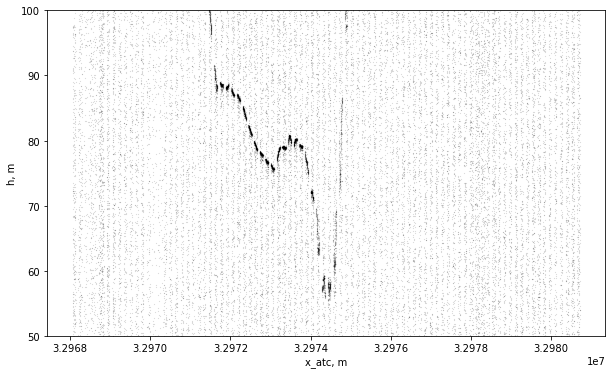

In [48]:
#Run this to look at one specific file, specified as fileref
fileref = 0
print('displaying #',fileref,'(name :',ATL03_file[fileref],')')
IS2_atl03_mds, IS2_atl03_attrs, IS2_atl03_beams =read_HDF5_ATL03(ATL03_file[fileref])

# add x_atc to the ATL03 data structure (this function adds to the LS2_ATL03_mds dictionary)
get_ATL03_x_atc(IS2_atl03_mds, IS2_atl03_attrs, IS2_atl03_beams)

#-- select the 1r beam from ATL03
D3 = IS2_atl03_mds['gt1r']

#-- create scatter plot of photon data (e.g., photon elevation vs x_atc)
%matplotlib inline
f1,ax = plt.subplots(num=1,figsize=(10,6))
plt.plot(D3['heights']['x_atc'], D3['heights']['h_ph'],'k.',markersize=0.1)
ax.set_xlabel('x_atc, m')
ax.set_ylabel('h, m')
ax.set_ylim(50,100)

plt.show()

/home/jovyan/crackup/ATL03-George-meltponds/processed_ATL03_20190206145852_06130212_001_01.h5
0


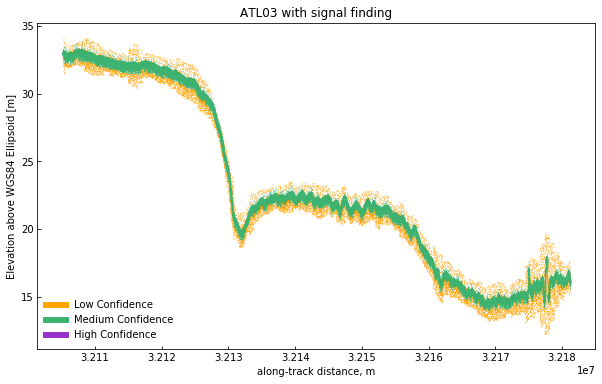

In [61]:
#Loop through all the files, plotting outputs with color-coded point confidences
min_elev=14
max_elev=18 #define the max elevation included in your plots

#create a big subplotted figure
# %matplotlib inline
# f1,ax = plt.subplots(1,len(good_refs),figsize=(6,10))
# ax = ax.flatten()

# read the IS2 data with Tyler's ATL03 reader:
# ticker = 0 #use this if you want to subplot rather than make individual plots
data_flag = []
for i, file in enumerate(ATL03_file):
    try:
        IS2_atl03_mds, IS2_atl03_attrs, IS2_atl03_beams =read_HDF5_ATL03(file)
        print(file)
    except:
        continue
    print(i)

    # add x_atc to the ATL03 data structure (this function adds to the LS2_ATL03_mds dictionary)
    get_ATL03_x_atc(IS2_atl03_mds, IS2_atl03_attrs, IS2_atl03_beams)

    #-- select the 1r beam from ATL03
    D3 = IS2_atl03_mds['gt2r']

    #comment-out if you use subplots instead
    %matplotlib inline
    f1,ax = plt.subplots(num=1,figsize=(10,6))

    #-- check confidence level associated with each photon event
    #-- -1: Events not associated with a specific surface type
    #--  0: noise
    #--  1: buffer but algorithm classifies as background
    #--  2: low
    #--  3: medium
    #--  4: high
    #-- Signal classification confidence for land ice
    #-- 0=Land; 1=Ocean; 2=SeaIce; 3=LandIce; 4=InlandWater
    
    #-- use photon confidence flags to identify background vs likely signal
    ice_sig_conf = D3['heights']['signal_conf_ph'][:,3]
#     bg, = np.nonzero((ice_sig_conf == 0) | (ice_sig_conf == 1))
    bg, = np.nonzero(ice_sig_conf == 1)
    lc, = np.nonzero(ice_sig_conf == 2)
    mc, = np.nonzero(ice_sig_conf == 3)
    hc, = np.nonzero(ice_sig_conf == 4)
    #-- Photon event delta time and elevation (WGS84)
#     ax.plot(D3['heights']['x_atc'][bg],D3['heights']['h_ph'][bg],marker='.',
#         markersize=0.25,lw=0,color='black',label='Buffer')
    ax.plot(D3['heights']['x_atc'][lc],D3['heights']['h_ph'][lc],marker='.',
        markersize=0.25,lw=0,color='orange',label='Low Confidence')
    ax.plot(D3['heights']['x_atc'][mc],D3['heights']['h_ph'][mc],marker='.',
        markersize=0.25,lw=0,color='mediumseagreen',label='Medium Confidence')
    ax.plot(D3['heights']['x_atc'][hc],D3['heights']['h_ph'][hc],marker='.',
        markersize=0.25,lw=0,color='darkorchid',label='High Confidence')
    #-- set title and labels
    ax.set_xlabel('along-track distance, m')
    ax.set_ylabel('Elevation above WGS84 Ellipsoid [m]')
    ax.set_title("ATL03 with signal finding")
#     ax.set_ylim(min_elev,max_elev)
# #     ax.set_xlim(3.2965e7,3.2969e7)
#     ax.set_xlim(3.216e7,3.218e7)
    #-- create legend
    lgd = ax.legend(loc=3,frameon=False)
    lgd.get_frame().set_alpha(1.0)
    for line in lgd.get_lines():
        line.set_linewidth(6)
    #-- adjust ticks
    ax.get_xaxis().set_tick_params(which='both',direction='in')
    ax.get_yaxis().set_tick_params(which='both',direction='in')


    #uncomment below and comment above if using subplots
#     ax[ticker].plot(D3['heights']['x_atc'][mc],D3['heights']['h_ph'][mc],marker='.',
#         markersize=0.25,lw=0,color='mediumseagreen',label='Medium Confidence')
#     ax[ticker].plot(D3['heights']['x_atc'][hc],D3['heights']['h_ph'][hc],marker='.',
#         markersize=0.25,lw=0,color='darkorchid',label='High Confidence')
#     #-- set title and labels
#     ax[ticker].set_xlabel('along-track distance, m')
#     ax[ticker].set_ylabel('Elevation above WGS84 Ellipsoid [m]')
#     ax[ticker].set_title("ATL03 with signal finding")
#     lgd = ax[ticker].legend(loc=3,frameon=False)
#     ax[ticker].get_xaxis().set_tick_params(which='both',direction='in')
#     ax[ticker].get_yaxis().set_tick_params(which='both',direction='in')
#     ax[ticker].set_ylim(0,500)

    #-- show the plot
    plt.show()
#     ticker=ticker+1



# #-- create scatter plot of photon data (e.g., photon elevation vs x_atc)
# f1,ax = plt.subplots(1,len(ATL03_file),figsize=(10,6))
# plt.plot(D3['heights']['x_atc'], D3['heights']['h_ph'],'k.',markersize=0.1)
# ax.set_xlabel('x_atc, m')
# ax.set_ylabel('h, m')

# plt.show()

I haven't gotten to this but I kept it because I think it could be a good starting point for looking at the ATL03 with respect to ATL06.

In [41]:
import numpy as np
import h5py


def ATL06_to_dict(filename, dataset_dict):
    """
        Read selected datasets from an ATL06 file

        Input arguments:
            filename: ATl06 file to read
            dataset_dict: A dictinary describing the fields to be read
                    keys give the group names to be read, 
                    entries are lists of datasets within the groups
        Output argument:
            D6: dictionary containing ATL06 data.  Each dataset in 
                dataset_dict has its own entry in D6.  Each dataset 
                in D6 contains a list of numpy arrays containing the 
                data
    """
    
    D6=[]
    pairs=[1, 2, 3]
    beams=['l','r']
    # open the HDF5 file
    with h5py.File(filename) as h5f:
        # loop over beam pairs
        for pair in pairs:
            # loop over beams
            for beam_ind, beam in enumerate(beams):
                # check if a beam exists, if not, skip it
                if '/gt%d%s/land_ice_segments' % (pair, beam) not in h5f:
                    continue
                # loop over the groups in the dataset dictionary
                temp={}
                for group in dataset_dict.keys():
                    for dataset in dataset_dict[group]:
                        DS='/gt%d%s/%s/%s' % (pair, beam, group, dataset)
                        # since a dataset may not exist in a file, we're going to try to read it, and if it doesn't work, we'll move on to the next:
                        try:
                            temp[dataset]=np.array(h5f[DS])
                            # some parameters have a _FillValue attribute.  If it exists, use it to identify bad values, and set them to np.NaN
                            if '_FillValue' in h5f[DS].attrs:
                                fill_value=h5f[DS].attrs['_FillValue']
                                bad=temp[dataset]==fill_value
                                temp[dataset]=np.float64(temp[dataset])
                                temp[dataset][bad]==np.NaN
                        except KeyError as e:
                            pass
                if len(temp) > 0:
                    # it's sometimes convenient to have the beam and the pair as part of the output data structure: This is how we put them there.
                    temp['pair']=np.zeros_like(temp['h_li'])+pair
                    temp['beam']=np.zeros_like(temp['h_li'])+beam_ind
                    temp['filename']=filename
                    D6.append(temp)
    return D6

The function returns a list of dictionary objects, where each dictionary contains the variables in the ATL06 product.  To tell the reader which variables to read, we just provide a dictionary that tells it where to look in the file (which groups to read) and what variables to read from each group.  Were going to read:
- /gtxx/land_ice_segments/h_li   : the land-ice height.
- /gtxx/land_ice_segments/delta_time : the time of the segment.
- /gtxx/land_ice_segments/ground_track/x_atc  : the along-track coordinate of the segment.

We define the dictionary that tells the function what to read like this:

In [12]:
dataset_dict={'land_ice_segments':['h_li', 'delta_time','longitude','latitude'], 'land_ice_segments/ground_track':['x_atc']}

... and then we use the reader function like this:

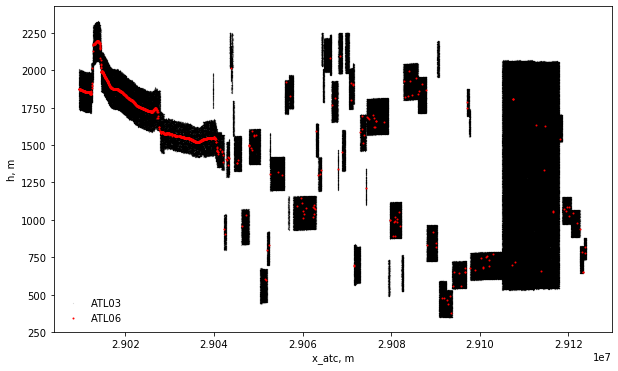

In [13]:

# read ATL06 into a dictionary (the ATL06 file has the same name as the ATL03 file, except for the product name)
ATL06_file=ATL03_file[0].replace('ATL03', 'ATL06')
D6_list=ATL06_to_dict(ATL06_file, dataset_dict)

# pick out gt1r:
D6 = D6_list[1]

# plot ATL03, with ATL06 on top:
f1,ax = plt.subplots(num=1,figsize=(10,6))
ax.plot(D3['heights']['x_atc'], D3['heights']['h_ph'],'k.',markersize=0.1, label='ATL03')
ax.plot(D6['x_atc'], D6['h_li'],'r.', markersize=2, label='ATL06')
lgd = ax.legend(loc=3,frameon=False)

ax.set_xlabel('x_atc, m')
ax.set_ylabel('h, m')
plt.show()


What we see here is that ATL06 found the surface in the same places that ATL03 did, but also reported heights in some of the noise-only areas. This is a consequence of attempting to find surfaces under marginal conditions.  

In [14]:
num_bad_segments=np.sum((D6['x_atc'] > 2.904e7) & (D6['x_atc'] < 2.912e7) & np.isfinite(D6['h_li']))
num_possible_segments=(2.912e7 - 2.904e7)/20
F_bad=num_bad_segments/num_possible_segments
print("fraction of bad segments = %3.3f" % F_bad)

fraction of bad segments = 0.043


The signal-to-noise threshold on ATL06 is supposed to let through about 5% of noise-only segments.  If we assume that everything beyond $2.094\times 10^7 m$ is noise, we find that ATL06 found a (bad) height about 4% of the time.  We'll work on cleaning these up in the next sections.